## Introduction ot Regression with Neural Networks in TensorFlow

There are many defination for a regression problme but in ur case,

**we're going to simplify it:**

  predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

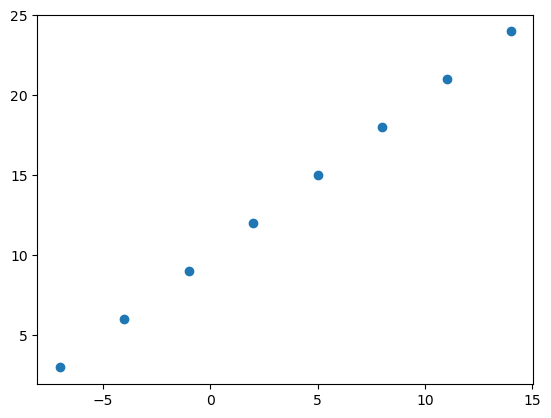

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# create feature

X=np.array([-7,-4,-1,2,5,8,11,14])

# create label
y=np.array([3,6,9,12,15,18,21,24])

# visualize it
plt.scatter(X,y)


# Input and Output

In [2]:

housing_info=tf.constant(["breedroom","bathroom","garage"])

housing_price=tf.constant([93400])



In [3]:
# Turn x and y to Tensor

X=tf.constant(X,dtype=tf.float32)
y=tf.constant(y,dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# steps in Modelling with Tenserflow 🏛️

1. createa a model - define the input and output layers, as well as the hidden layers of a deep learning model.

2. compile a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. fitting a model - letting the model try to find patterns between X & y (features and labels).

4. evaluate a model - how well the model is doing.

In [32]:
# set random seed

tf.random.set_seed(42)

# 1. create a model using sequential API

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1) # one hidden Layer
])

# 2. compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.SGD(),
              loss=tf.keras.losses.mae, # mean absolute error,
              metrics=["mae"]
              )

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated to expand dims

Epoch 1/5
1/1 [==============================] - 0s 149ms/step - loss: 8.9568 - mae: 8.9568
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 8.8243 - mae: 8.8243
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 8.6918 - mae: 8.6918
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 8.5593 - mae: 8.5593
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 8.4268 - mae: 8.4268


In [5]:
# check out X and y

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [33]:
# Try to make prediction

model.predict([20])


1/1 [==============================] - 0s 47ms/step


array([[29.510992]], dtype=float32)

## Improving the Model

we can improve  our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [37]:
# lets rebuild the model

# 1. create the model

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=["mae"]
)

# 3. Fit the model (longer Time)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated to expand dims


Epoch 1/100
1/1 [==============================] - 0s 135ms/step - loss: 17.2424 - mae: 17.2424
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 16.9612 - mae: 16.9612
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 16.6799 - mae: 16.6799
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 16.3987 - mae: 16.3987
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 16.1174 - mae: 16.1174
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 15.8362 - mae: 15.8362
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 15.5549 - mae: 15.5549
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 15.2737 - mae: 15.2737
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 14.9924 - mae: 14.9924
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 14.7737 - mae: 14.7737
Epoch 11/100
1/1 [==============================] - 0s 7m

In [48]:
model.predict([17])

1/1 [==============================] - 0s 30ms/step


array([[29.488098]], dtype=float32)

In [74]:
# Recreate model 2 with extra 100 layers

model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
    metrics=["mae"]

)

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)



Epoch 1/100


/Users/magesh/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 202ms/step - loss: 12.9805 - mae: 12.9805
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.3440 - mae: 12.3440
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7141 - mae: 11.7141
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0883 - mae: 11.0883
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4622 - mae: 10.4622
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.8311 - mae: 9.8311
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.1900 - mae: 9.1900
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 8.5341 - mae: 8.5341
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.8585 - mae: 7.8585
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.1589 - mae: 7.1589
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 

In [75]:
model.predict([17])

1/1 [==============================] - 0s 45ms/step


array([[27.817774]], dtype=float32)